# Standardizasyon ve Normalizasyon İşlemleriyle Tekli Anomali İncelemesi

### Özet

Önceki kernel'de yaptığımız şeyleri şimdi normalizasyon ya da ölçeklendirilme işlemi uygulanmış datalarda deneyeceğiz ve aralarındaki farkı inceleyeceğiz. Standardizasyon için **Standard Scaler**, Normalizasyon için ise **Min Max Scaler** ve **Robust Scaler** kullanacağız.

#### Gerekli Kütüphanelerin Yüklenmesi

In [1]:
import pandas as pd 
import numpy as np 
import random 
import matplotlib.pyplot as plt 
import seaborn as sns
import anomaly_detection_methods as adm

import warnings 
warnings.filterwarnings('ignore')

Aynı verimizi tekrar oluşturalım ve onun üzerinden işlem gerçekleştirelim.

#### Veri Setinin Okunması

In [2]:
df = pd.read_csv('./WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Wine Quality  veri setinden çalışmada kullanılması için **chlorides** özniteliği seçilmiştir

In [3]:
data = df['chlorides']

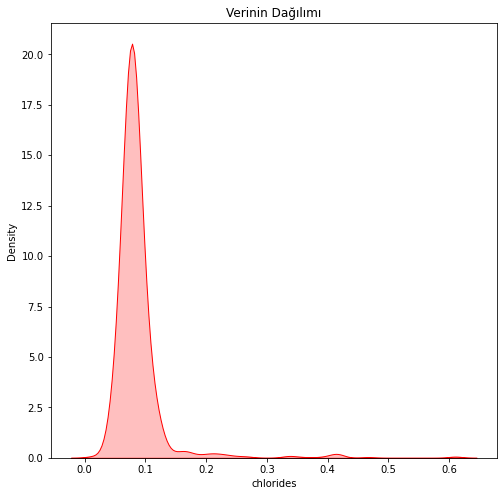

In [4]:
plt.figure(figsize = (8,8))
sns.kdeplot(data, fill = True,   color = 'r')
plt.title("Verinin Dağılımı");

Verinin istatistiksel bilgilerini gösterelim.

In [5]:
data.describe()

count    1143.000000
mean        0.086933
std         0.047267
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

Ortalama + Standard Sapma Değerlerini Verinin Dağılımı Üzerinde Gösterelim

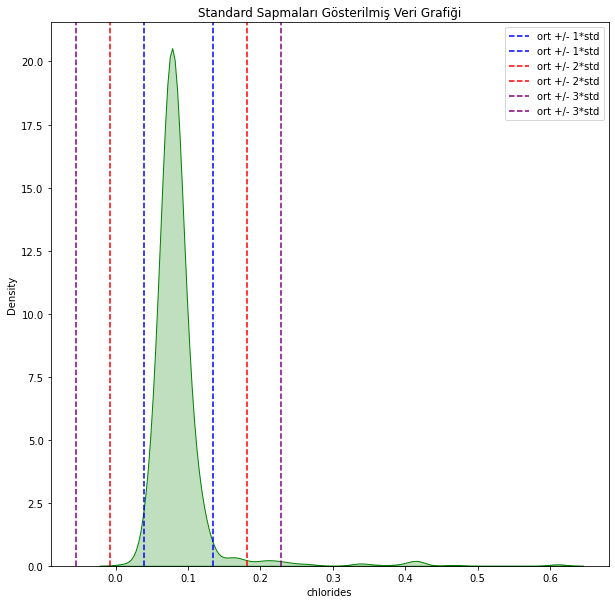

In [6]:
plt.figure(figsize =(10,10))
plt.title("Standard Sapmaları Gösterilmiş Veri Grafiği")
plt.axvline(x = data.std()+data.mean(), c = "b", linestyle ='--')
plt.axvline(x = -data.std()+data.mean(), c = "b", linestyle ='--')
plt.axvline(x = 2*data.std()+data.mean(), c = "r", linestyle ='--')
plt.axvline(x = -2*data.std()+data.mean(), c = "r", linestyle ='--')
plt.axvline(x = 3*data.std()+data.mean(), c = "purple", linestyle ='--')
plt.axvline(x = -3*data.std()+data.mean(), c = "purple", linestyle ='--')
sns.kdeplot(data, fill = True,  color = 'g')
plt.legend(['ort +/- 1*std','ort +/- 1*std','ort +/- 2*std','ort +/- 2*std','ort +/- 3*std','ort +/- 3*std'])
plt.show();

## Standardizasyon

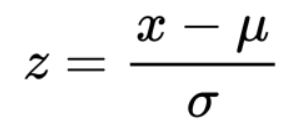

In [7]:
standardized_data =  adm.standardization(data.values)

Standardize etme işlemi başlamıştır
Standardize edilmeden önceki ortalama: 0.08693263342082239
Standardize edilmeden önceki standard sapma: 0.04724665655215518
Standardize etme işlemi başarıyla gerçekleşmiştir


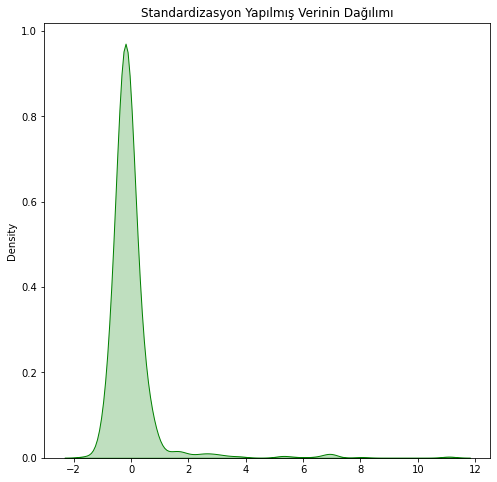

In [8]:
plt.figure(figsize = (8,8))
sns.kdeplot(standardized_data, fill = True,  color = 'g')
plt.title("Standardizasyon Yapılmış Verinin Dağılımı");

Şimdi ise Standardize edilmiş data ile normal datayı kıyaslayalım.

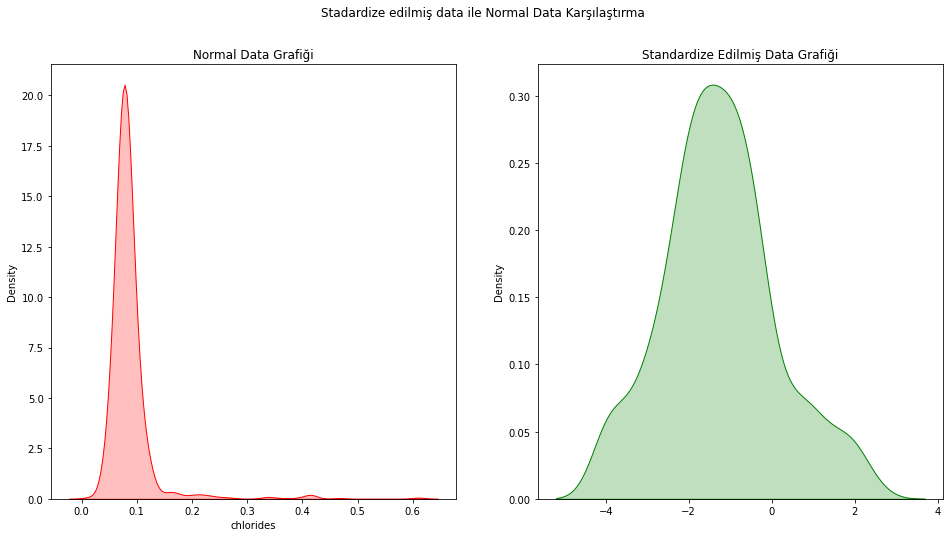

In [9]:
plt.subplots(1,2,figsize = (16,8))
plt.suptitle("Stadardize edilmiş data ile Normal Data Karşılaştırma")
plt.subplot(121)
plt.title("Normal Data Grafiği")
sns.kdeplot(data, fill = True,   color = 'r')

plt.subplot(122)
plt.title("Standardize Edilmiş Data Grafiği")
sns.kdeplot(np.log(standardized_data), fill = True,  color = 'g');

Karşılaştırmaya baktığımızda verimizin soğa doğru kaydığını görürüz. Bu neden oluştu? Çünkü Standardize etmek ortalamayı 0'a yaklaştıracağı için böyle olmuştur.

Standardize edilmiş verinin incelemesi

In [10]:
standardized_data_s = pd.Series(standardized_data)
standardized_data_s.describe()

count    1143.000000
mean        0.000044
std         1.000202
min        -1.590000
25%        -0.360000
50%        -0.170000
75%         0.060000
max        11.090000
dtype: float64

İstatistiksel verilerde de görüldüğü üzere ortalama 0 olmamıştır (veri çok düzensiz olduğu için) fakat 0 a yaklaşmıştır.

Ortalama + Standard Sapma Değerlerinin Standardize Edilmiş Veri Üzerinde Gösterimini İnceleyelim.

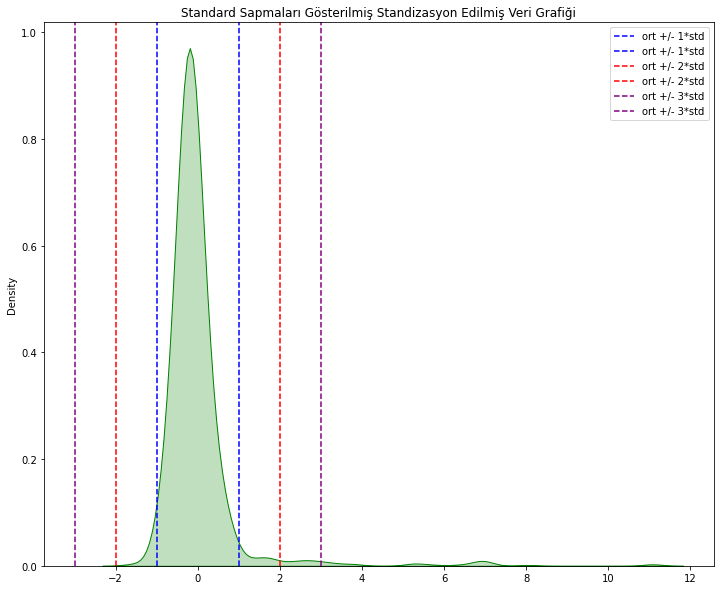

In [11]:
plt.figure(figsize =(12,10))
plt.title("Standard Sapmaları Gösterilmiş Standizasyon Edilmiş Veri Grafiği")
plt.axvline(x = standardized_data.std()+standardized_data.mean(), c = "b", linestyle ='--')
plt.axvline(x = -standardized_data.std()+standardized_data.mean(), c = "b", linestyle ='--')
plt.axvline(x = 2*standardized_data.std()+standardized_data.mean(), c = "r", linestyle ='--')
plt.axvline(x = -2*standardized_data.std()+standardized_data.mean(), c = "r", linestyle ='--')
plt.axvline(x = 3*standardized_data.std()+standardized_data.mean(), c = "purple", linestyle ='--')
plt.axvline(x = -3*standardized_data.std()+standardized_data.mean(), c = "purple", linestyle ='--')
sns.kdeplot(standardized_data, fill = True,  color = 'g')
plt.legend(['ort +/- 1*std','ort +/- 1*std','ort +/- 2*std','ort +/- 2*std','ort +/- 3*std','ort +/- 3*std'])
plt.show();

Şimdi ise Standardize ve normal datanın IQR çizgilerine göre karşılaştırmasını yapalım

In [12]:
#IQR alt ve üst sınır bulma işlemi
lower_bound_normal_iqr, upper_bound_normal_iqr = adm.anomaly_detection_with_IQR(data, 1.5)
print("-"*80)
lower_bound_standardized_iqr, upper_bound_standardized_iqr = adm.anomaly_detection_with_IQR(pd.Series(standardized_data), 1.5)

Anomaly Detection precess with finding IQR started
Cofficent: 1.5
Low Edge: 0.04000000000000002
Upper Edge: 0.11999999999999998
Anomaly detection process with finding IQR finished succesfully.
--------------------------------------------------------------------------------
Anomaly Detection precess with finding IQR started
Cofficent: 1.5
Low Edge: -0.99
Upper Edge: 0.69
Anomaly detection process with finding IQR finished succesfully.


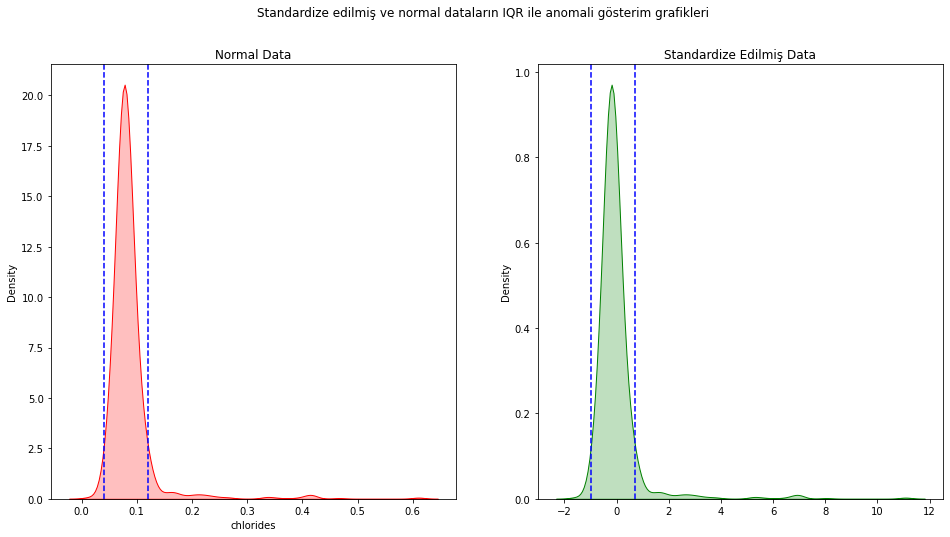

In [13]:
plt.subplots(1,2,figsize = (16,8))
plt.suptitle("Standardize edilmiş ve normal dataların IQR ile anomali gösterim grafikleri")

plt.subplot(121)
plt.title("Normal Data")
plt.axvline(x = lower_bound_normal_iqr, c = "b", linestyle ='--')
plt.axvline(x = upper_bound_normal_iqr, c = "b", linestyle ='--')
sns.kdeplot(data, fill = True,  color = 'r')

plt.subplot(122)
plt.title("Standardize Edilmiş Data")
plt.axvline(x = lower_bound_standardized_iqr, c = "b", linestyle ='--')
plt.axvline(x = upper_bound_standardized_iqr, c = "b", linestyle ='--')
sns.kdeplot(standardized_data, fill = True,  color = 'g')

plt.show();

In [14]:
#Normal Veri IQR ile Anomali Değer Hesaplama
iqr_anomaly_data =  len(df[(data < lower_bound_normal_iqr) | (data > upper_bound_normal_iqr)])

#Standardize Edilmiş Veri IQR işlemi 
st_data_df = pd.DataFrame(standardized_data)
iqr_anomaly_st_data = len(st_data_df[(st_data_df.values < lower_bound_standardized_iqr) | 
                                     (st_data_df.values >upper_bound_standardized_iqr)])
""
print("Normal Data IQR ile Ölçülmüş Anomali Değerler:",iqr_anomaly_data)
print("Standardize Edilmiş Data'nın IQR ile Ölçülmüş Anomali Değerleri:", iqr_anomaly_st_data)

Normal Data IQR ile Ölçülmüş Anomali Değerler: 77
Standardize Edilmiş Data'nın IQR ile Ölçülmüş Anomali Değerleri: 77


Veri aynı oranda standardize edildiği için anomali değer sayısında bir değişim gözlenmemiştir.

Bir dataframe oluşturalım ve bu dataframe de Standardizasyon verisinde IQR'ın Anomali dediklerini ve demediklerini 1 ve 0 diye işaretlendirelim bunu diğer Normalizasyon türleri için de yapalım

In [15]:
iqr_df = pd.DataFrame()
iqr_df['Standard Scaler'] = np.zeros(len(df))
standard_missing_values_index = st_data_df[(st_data_df.values < lower_bound_standardized_iqr) | 
                                           (st_data_df.values > upper_bound_standardized_iqr)].index
iqr_df.loc[standard_missing_values_index, 'Standard Scaler'] = 1
iqr_df['Standard Scaler'].value_counts()

0.0    1066
1.0      77
Name: Standard Scaler, dtype: int64



Standardizasyon edilmiş veriyi inceledik şimdi ise **Robust Scaler** ve **Min Max Scaler** olmak üzere 2 normalize etme işlemini ayrı ayrı inceleyerek onları da gözlemleyelim.


## Normalizasyon (Min Max Scaler)

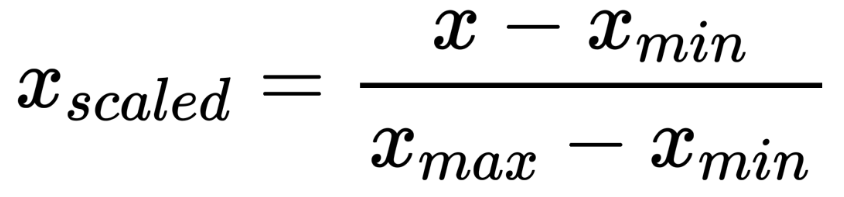

Min Max Scale işlemini gerçekleştiriyoruz.

In [16]:
mm_scaled_data = adm.min_max_scaling(data.values)

Min Max Scaling started
Min Max Scaling finished Succesfully


Min Max Scaler Uygulanmış Datayı inceleyelim

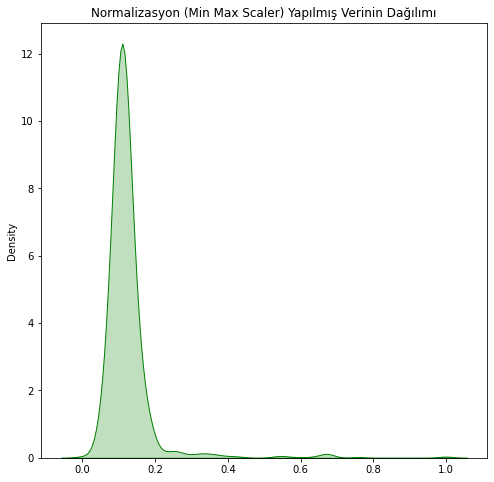

In [17]:
plt.figure(figsize = (8,8))
sns.kdeplot(mm_scaled_data, fill = True,  color = 'g')
plt.title("Normalizasyon (Min Max Scaler) Yapılmış Verinin Dağılımı");

Normal veriyle karşılaştıralım

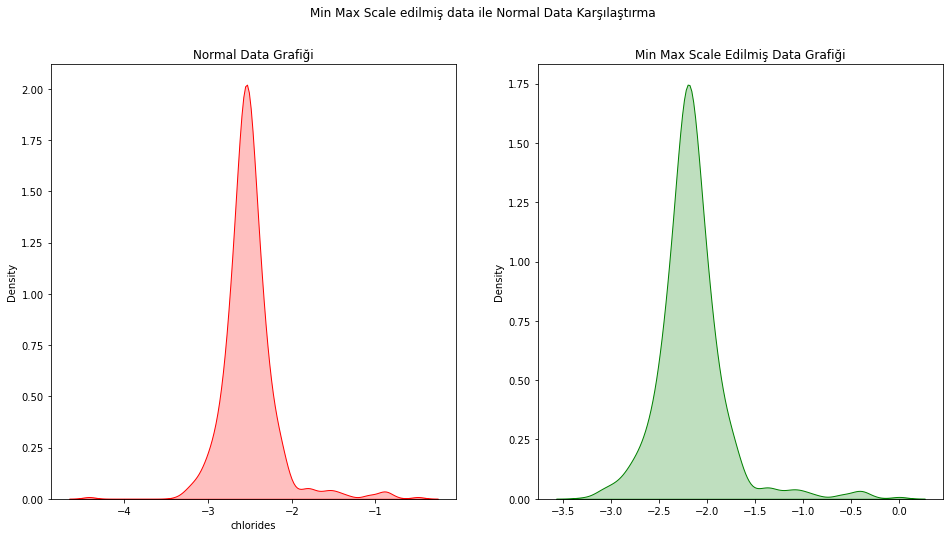

In [18]:
plt.subplots(1,2,figsize = (16,8))
plt.suptitle("Min Max Scale edilmiş data ile Normal Data Karşılaştırma")
plt.subplot(121)
plt.title("Normal Data Grafiği")
sns.kdeplot(np.log(data), fill = True,   color = 'r')

plt.subplot(122)
plt.title("Min Max Scale Edilmiş Data Grafiği")
sns.kdeplot(np.log(mm_scaled_data), fill = True,  color = 'g');

Görüldüğü üzere ilk bakıştı verinin sadece ölçek olarak küçültüldüğü gözümüze çarpmaktadır.

In [19]:
mm_scaled_data_s = pd.Series(mm_scaled_data)
mm_scaled_data_s.describe()

count    1143.000000
mean        0.125096
std         0.078910
min         0.000000
25%         0.096828
50%         0.111853
75%         0.130217
max         1.000000
dtype: float64

Yukarıda da bahsettiğimiz gibi max 1, min 0 olmak üzere bir ölçekleme işlemi gerçekleşmiştir.

Min Max Scaler ile normalize edilmiş verinin IQR ile anomali tespiti için alt ve üst sınırlarını buluyoruz.

In [20]:
lower_bound_mm, upper_bound_mm =  adm.anomaly_detection_with_IQR(pd.Series(mm_scaled_data), 1.5)

Anomaly Detection precess with finding IQR started
Cofficent: 1.5
Low Edge: 0.04674457429048417
Upper Edge: 0.18030050083472454
Anomaly detection process with finding IQR finished succesfully.


Ortalama  + standard sapma aralıklarını Min Max Scale eidlmiş veri üzerinde gösteriyoruz.

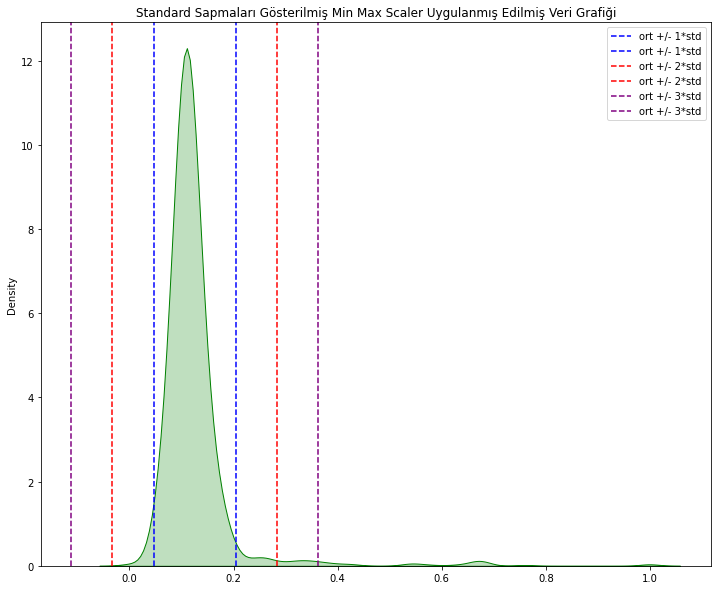

In [21]:
plt.figure(figsize =(12,10))
plt.title("Standard Sapmaları Gösterilmiş Min Max Scaler Uygulanmış Edilmiş Veri Grafiği")
plt.axvline(x = mm_scaled_data.mean()+mm_scaled_data.std(), c = "b", linestyle ='--')
plt.axvline(x = -mm_scaled_data.std()+mm_scaled_data.mean(), c = "b", linestyle ='--')
plt.axvline(x = 2*mm_scaled_data.std()+mm_scaled_data.mean(), c = "r", linestyle ='--')
plt.axvline(x = -2*mm_scaled_data.std()+mm_scaled_data.mean(), c = "r", linestyle ='--')
plt.axvline(x = 3*mm_scaled_data.std()+mm_scaled_data.mean(), c = "purple", linestyle ='--')
plt.axvline(x = -3*mm_scaled_data.std()+mm_scaled_data.mean(), c = "purple", linestyle ='--')
sns.kdeplot(mm_scaled_data, fill = True,  color = 'g')
plt.legend(['ort +/- 1*std','ort +/- 1*std','ort +/- 2*std','ort +/- 2*std','ort +/- 3*std','ort +/- 3*std'])
plt.show();

Buradaki standard sapma değerierine bakacak olursak. Görüldüğü üzer anomali tespiti için kötü bir standard sapma aralığıdır ve verinin normalize edilmiş hali de 0 ile 1 arasında olduğu için bu tür normalize edilmiş veride anomali çalışması yapmak mantıklı değildir, bizi yanlış sonuçlara yönlendirecektir.

Şimdi de Normal Data İle Min Max Scale edilmiş datayı IQR ile hesaplanmış anomali değerleri bazında karşılaştıralım.

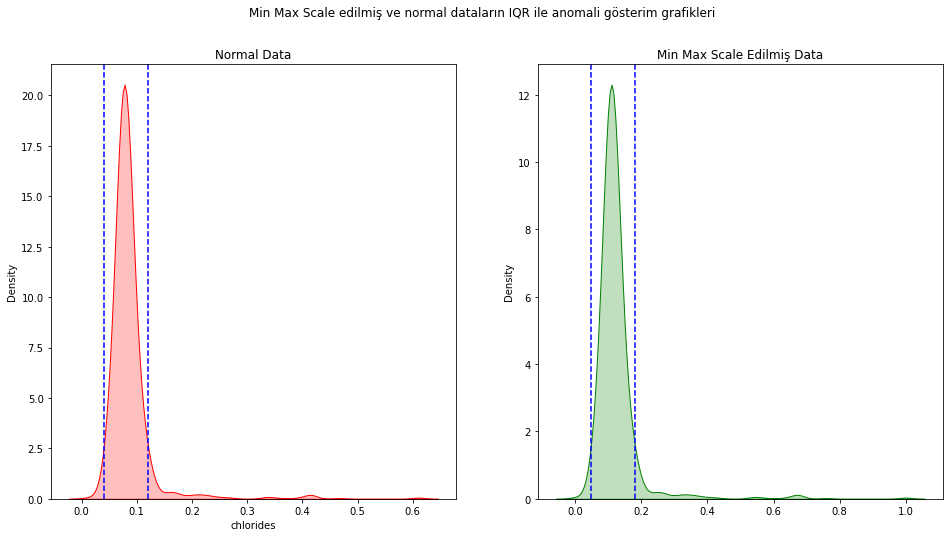

In [22]:
plt.subplots(1,2,figsize = (16,8))
plt.suptitle("Min Max Scale edilmiş ve normal dataların IQR ile anomali gösterim grafikleri")

plt.subplot(121)
plt.title("Normal Data")
plt.axvline(x = lower_bound_normal_iqr, c = "b", linestyle ='--')
plt.axvline(x = upper_bound_normal_iqr, c = "b", linestyle ='--')
sns.kdeplot(data, fill = True,  color = 'r')

plt.subplot(122)
plt.title("Min Max Scale Edilmiş Data")
plt.axvline(x = lower_bound_mm, c = "b", linestyle ='--')
plt.axvline(x = upper_bound_mm, c = "b", linestyle ='--')
sns.kdeplot(mm_scaled_data, fill = True,  color = 'g')

plt.show();

Grafiği sayısal hale dönüştürelim.

In [23]:
#min max scaler için
mm_data_df = pd.DataFrame(mm_scaled_data)
iqr_anomaly_data_mm = len(mm_data_df[(mm_data_df.values < lower_bound_mm) | (mm_data_df.values > upper_bound_mm)])

print("Normal Veri İçin IQR ile hesaplanmış anomali değerlerin sayısı:",iqr_anomaly_data)
print("Min Max Scale Edilmiş Veri İçin IQR ile hesaplanmış anomali değerlerin sayısı:",iqr_anomaly_data_mm)

Normal Veri İçin IQR ile hesaplanmış anomali değerlerin sayısı: 77
Min Max Scale Edilmiş Veri İçin IQR ile hesaplanmış anomali değerlerin sayısı: 74


Hedef scala çok daraldığı için bazı sayılar IQR yöntemine göre anomali olmaktan çıkabiliyor..

Min Max Scaler sonrasında elde edilmiş verilerin IQR işlemi sonrasında anomali durumlarına göre numaralandırma işlemini gerçekleştirelim.

In [24]:
iqr_df['Min Max Scaler'] = 0
mm_anomaly_values_index = mm_data_df[(mm_data_df.values < lower_bound_mm) | (mm_data_df.values > upper_bound_mm)].index
iqr_df.loc[mm_anomaly_values_index, "Min Max Scaler"] = 1
iqr_df['Min Max Scaler'].value_counts()

0    1069
1      74
Name: Min Max Scaler, dtype: int64

### Normalizasyon (Robust Scaler)

Aşağıdaki formülden de görüldüğü üzere robust scaler'ın min max scaler'dan farkı min max scaler'da paydada max değerden min değeri çıkararak işlem yapılır. Yani bu ne demek? Verilerimizin en büyük değerinin 1 en küçük değerinin ise 0 olması demek. Robust scaler'da ise bu değişiyor. Robust Scaler'da 3.kartilden 1.kartil çıkıyor. Yani yeni oluşan veride 3.kartilden sonraki ve 1.kartilden önceki değerler olmuyor. Buna birnevi aykırı değerleri almıyor diyebilir miyiz? Evet diyebiliriz fakat ne kadar sağlıklıdır orası tartışılır tabi ki. Son olarak da Robust scaler medyanı veriden çıkartarak işlem yaptığı için temel amacı verilerin aykırı gözlem olmadan medyan bazında toplamaktır. Çünkü anomali değerlerden kurtulmak için medyan bazında, anomalileri incelemek için ise ortalama bazında işlem yapılır.

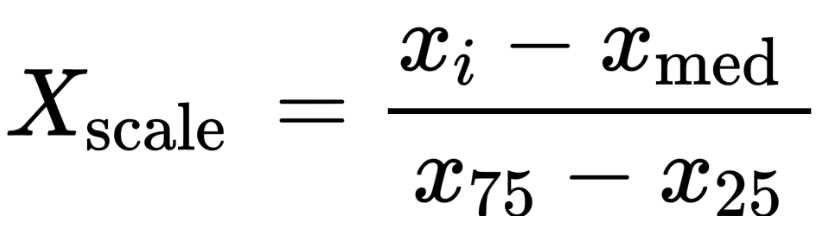

#### Robust Scaler Uygulaması

In [25]:
r_scaled_data = adm.robust_scaler(data)

Robust Scaling started
Robust Scaling finished succesfully


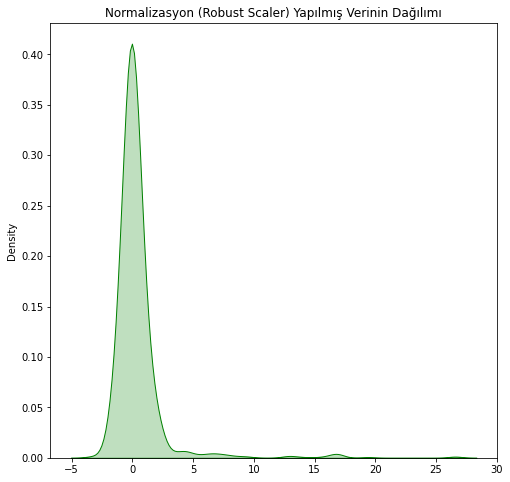

In [26]:
plt.figure(figsize = (8,8))
sns.kdeplot(r_scaled_data, fill = True,  color = 'g')
plt.title("Normalizasyon (Robust Scaler) Yapılmış Verinin Dağılımı");

Normal veriyle Karşılaştıralım

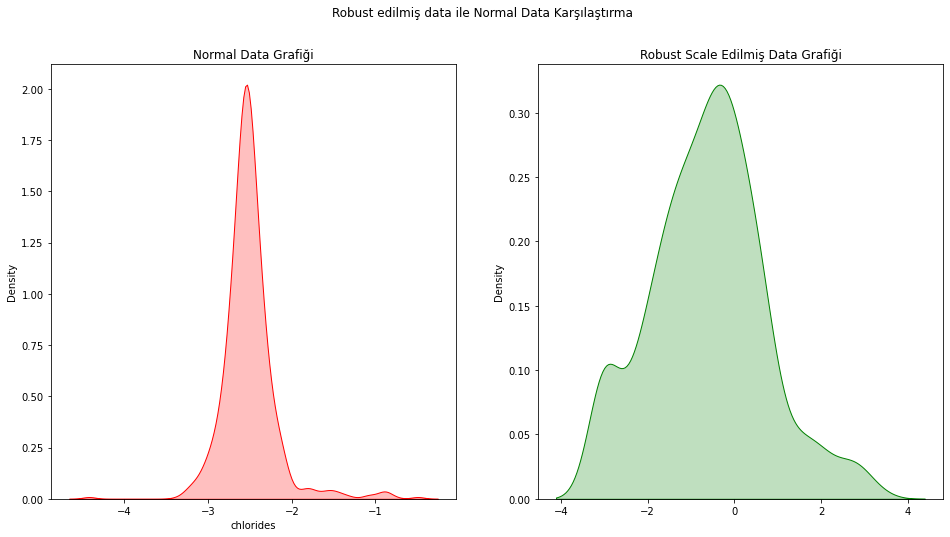

In [27]:
plt.subplots(1,2,figsize = (16,8))
plt.suptitle("Robust edilmiş data ile Normal Data Karşılaştırma")
plt.subplot(121)
plt.title("Normal Data Grafiği")
sns.kdeplot(np.log(data), fill = True,   color = 'r')

plt.subplot(122)
plt.title("Robust Scale Edilmiş Data Grafiği")
sns.kdeplot(np.log(r_scaled_data), fill = True,  color = 'g');

Yine bir sağa kayma mevcuttur

İstatistiksel bilgilerine bakalım

In [28]:
r_scaled_data_s = pd.Series(r_scaled_data)
r_scaled_data_s.describe()

count    1143.000000
mean        0.396632
std         2.363367
min        -3.350000
25%        -0.450000
50%         0.000000
75%         0.550000
max        26.600000
dtype: float64

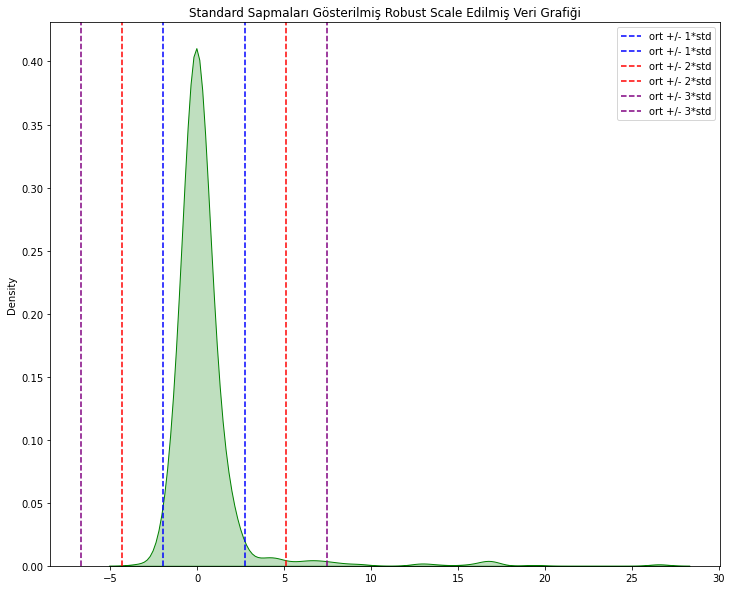

In [29]:
plt.figure(figsize =(12,10))
plt.title("Standard Sapmaları Gösterilmiş Robust Scale Edilmiş Veri Grafiği")
plt.axvline(x = r_scaled_data.std()+r_scaled_data.mean(), c = "b", linestyle ='--')
plt.axvline(x = -r_scaled_data.std()+r_scaled_data.mean(), c = "b", linestyle ='--')
plt.axvline(x = 2*r_scaled_data.std()+r_scaled_data.mean(), c = "r", linestyle ='--')
plt.axvline(x = -2*r_scaled_data.std()+r_scaled_data.mean(), c = "r", linestyle ='--')
plt.axvline(x = 3*r_scaled_data.std()+r_scaled_data.mean(), c = "purple", linestyle ='--')
plt.axvline(x = -3*r_scaled_data.std()+r_scaled_data.mean(), c = "purple", linestyle ='--')
sns.kdeplot(r_scaled_data, fill = True,  color = 'g')
plt.legend(['ort +/- 1*std','ort +/- 1*std','ort +/- 2*std','ort +/- 2*std','ort +/- 3*std','ort +/- 3*std'])
plt.show();

Görüldüğü üzere aynı standardizasyondaki gibi kısımlarda 3 standart sapma çizgilerini gördük. Bu kısımda dikkat etmemiz gereken şey zaten robust scaler aykırı değerleri almıştı. Şimdi bir daha bu işlemi yaparsak gereksiz olacaktır ki standardizsayona benzeme nedeni de birinin ortalama birinin medyan tabanlı scale yapması ve sadece robust scaler kartil tabanlı scale yaptığı için oransal bir küçülme oluyor doğal olarak standart sapmalarda. Bunun için benzer bir grafik elde etmiş olduk.

Bir de kontrol için IQR ile anomali değer analizinde Normal ve Robust Scale edilmiş veriyi inceleyelim.

In [30]:
lower_bound_r, upper_bound_r =  adm.anomaly_detection_with_IQR(pd.Series(r_scaled_data), 1.5)

Anomaly Detection precess with finding IQR started
Cofficent: 1.5
Low Edge: -1.95
Upper Edge: 2.05
Anomaly detection process with finding IQR finished succesfully.


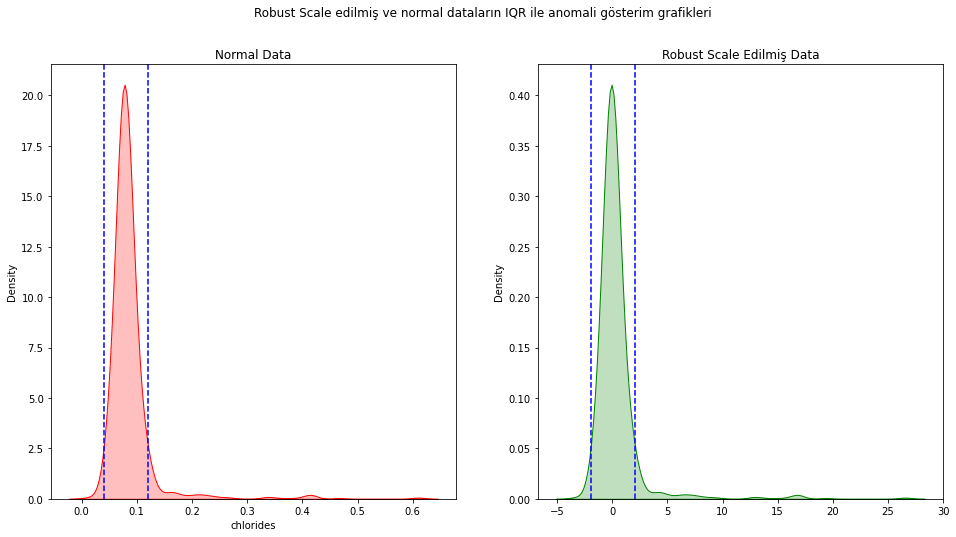

In [31]:
plt.subplots(1,2,figsize = (16,8))
plt.suptitle("Robust Scale edilmiş ve normal dataların IQR ile anomali gösterim grafikleri")

plt.subplot(121)
plt.title("Normal Data")
plt.axvline(x = lower_bound_normal_iqr, c = "b", linestyle ='--')
plt.axvline(x = upper_bound_normal_iqr, c = "b", linestyle ='--')
sns.kdeplot(data, fill = True,  color = 'r')

plt.subplot(122)
plt.title("Robust Scale Edilmiş Data")
plt.axvline(x = lower_bound_r, c = "b", linestyle ='--')
plt.axvline(x = upper_bound_r, c = "b", linestyle ='--')
sns.kdeplot(r_scaled_data, fill = True,  color = 'g')

plt.show();

Grafiği Sayısal hale dökelim

In [32]:
#min max scaler için
r_data_df = pd.DataFrame(r_scaled_data)
iqr_anomaly_data_r = len(r_data_df[(r_data_df.values < lower_bound_r) | (r_data_df.values > upper_bound_r)])

print("Normal Veri İçin IQR ile hesaplanmış anomali değerlerin sayısı:",iqr_anomaly_data)
print("Min Max Scale Edilmiş Veri İçin IQR ile hesaplanmış anomali değerlerin sayısı:",iqr_anomaly_data_r)

Normal Veri İçin IQR ile hesaplanmış anomali değerlerin sayısı: 77
Min Max Scale Edilmiş Veri İçin IQR ile hesaplanmış anomali değerlerin sayısı: 77


Robust scaler edilmiş data üzerinden IQR hesaplaması sonrasında oluşan anomali değerlerini numaralandırma işlemini gerçekleştirelim.

In [33]:
iqr_df['Robust Scaler'] = 0
r_anomaly_values_index = r_data_df[(r_data_df.values < lower_bound_r) | (r_data_df.values > upper_bound_r)].index
iqr_df.loc[r_anomaly_values_index, "Robust Scaler"] = 1
iqr_df['Robust Scaler'].value_counts()

0    1066
1      77
Name: Robust Scaler, dtype: int64

**Sonuç olarak** <br>
Baktığımızda IQR için standardize edilmiş veriyi kullanacağız. Çünkü ortalamayı 0, standard sapmayı 1 yaparak veri dağılımını 2 boyutlu düzlemde gaussian dağılıma şekline dönüştürürek IQR işlemini gerçekleştireceğiz.

Tamam! Standardizasyon kullacağımıza karar verdik fakat IQR işleminin formülündeki 1.5 katsayısı nerden geliyor diye düşünecek olursak? Bunun ispatını da katsayıyı 1,1.5,2 olarak aralarındaki farkı alarak gösterelim.

Belirlediğimiz katsayılar için yukardaki metodu çağıralım.

In [34]:
low_edge, upper_edge  = adm.anomaly_detection_with_IQR(pd.Series(standardized_data), 1)

Anomaly Detection precess with finding IQR started
Cofficent: 1
Low Edge: -0.78
Upper Edge: 0.48
Anomaly detection process with finding IQR finished succesfully.


Bir grafikte bu değerleri gözlemleyelim.

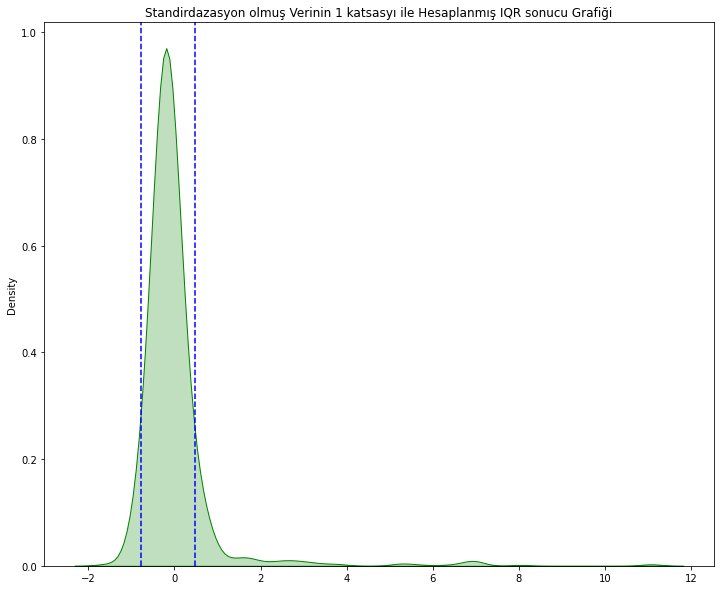

In [35]:
adm.IQR_edges_plot(standardized_data, low_edge, upper_edge, 
                   "Standirdazasyon olmuş Verinin 1 katsasyı ile Hesaplanmış IQR sonucu Grafiği")

Görüldüğü üzere katsayıyı 1 aldığımızda grafiğimizde orta alanın dışında kalacak yerler anomali değer olmaktadır.

Kaysatı 2 için işlemimizi gerçekleştirelim.

In [36]:
low_edge, upper_edge = adm.anomaly_detection_with_IQR(pd.Series(standardized_data), 2)

Anomaly Detection precess with finding IQR started
Cofficent: 2
Low Edge: -1.2
Upper Edge: 0.8999999999999999
Anomaly detection process with finding IQR finished succesfully.


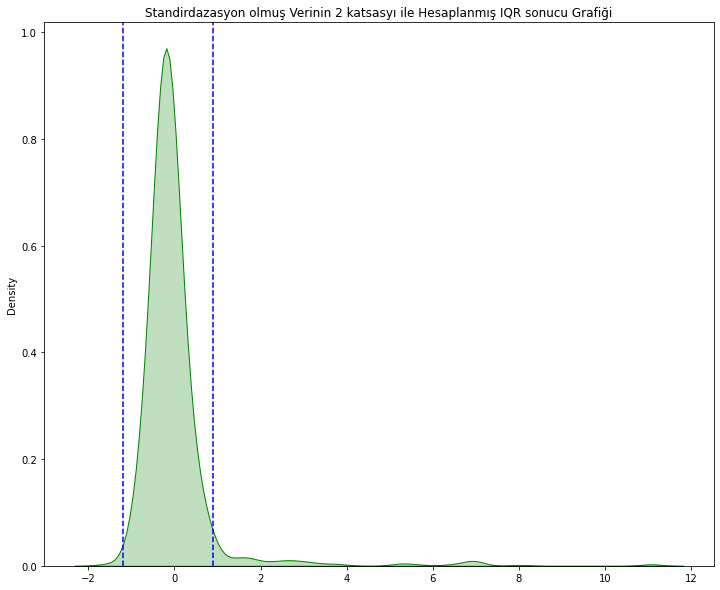

In [37]:
adm.IQR_edges_plot(standardized_data, low_edge, upper_edge,
                   "Standirdazasyon olmuş Verinin 2 katsasyı ile Hesaplanmış IQR sonucu Grafiği")

Görüldüğü üzere 2'de de sınır değerlerimiz 3 standard sapma değerinin üstüne çıktı. 

Şimdi son olarak da 1.5 için deneyelim.

In [38]:
low_edge,upper_edge = adm.anomaly_detection_with_IQR(pd.Series(standardized_data), 1.5)

Anomaly Detection precess with finding IQR started
Cofficent: 1.5
Low Edge: -0.99
Upper Edge: 0.69
Anomaly detection process with finding IQR finished succesfully.


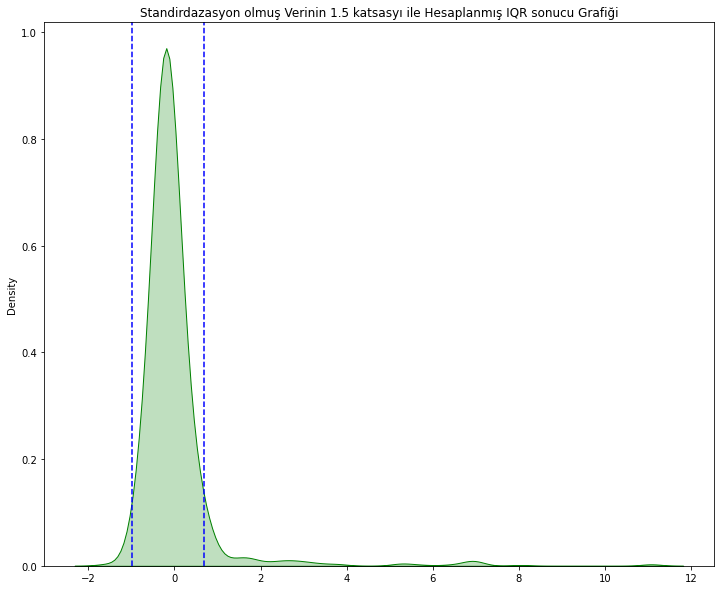

In [39]:
adm.IQR_edges_plot(standardized_data, low_edge, upper_edge,
                   "Standirdazasyon olmuş Verinin 1.5 katsasyı ile Hesaplanmış IQR sonucu Grafiği")

Görüldüğü üzere 1.5 katsayısı 1 ve 2 katsayılarına nazaran 3 standart sapma aralığına en çok yaklaşan değer olmuştur. 

Peki neden 1.5? Biz 1.6 veya 1.7 dediğimizde 3 standard sapma aralığına daha çok yaklaşmış olabilirdi. 

Gelen Verisetlerine baktığımızda hepsinin dağılımı birbiriyle aynı değildir fakat hepsi normal dağılım olarak nitelendirilmektedir. Bunun için bu değişkenliği göze alarak 1.5 katsayı değeri benimsenmiştir.

### IQR için Normalizasyon ya da Standardizasyon uygulanmış verilerin karşılaştırılması

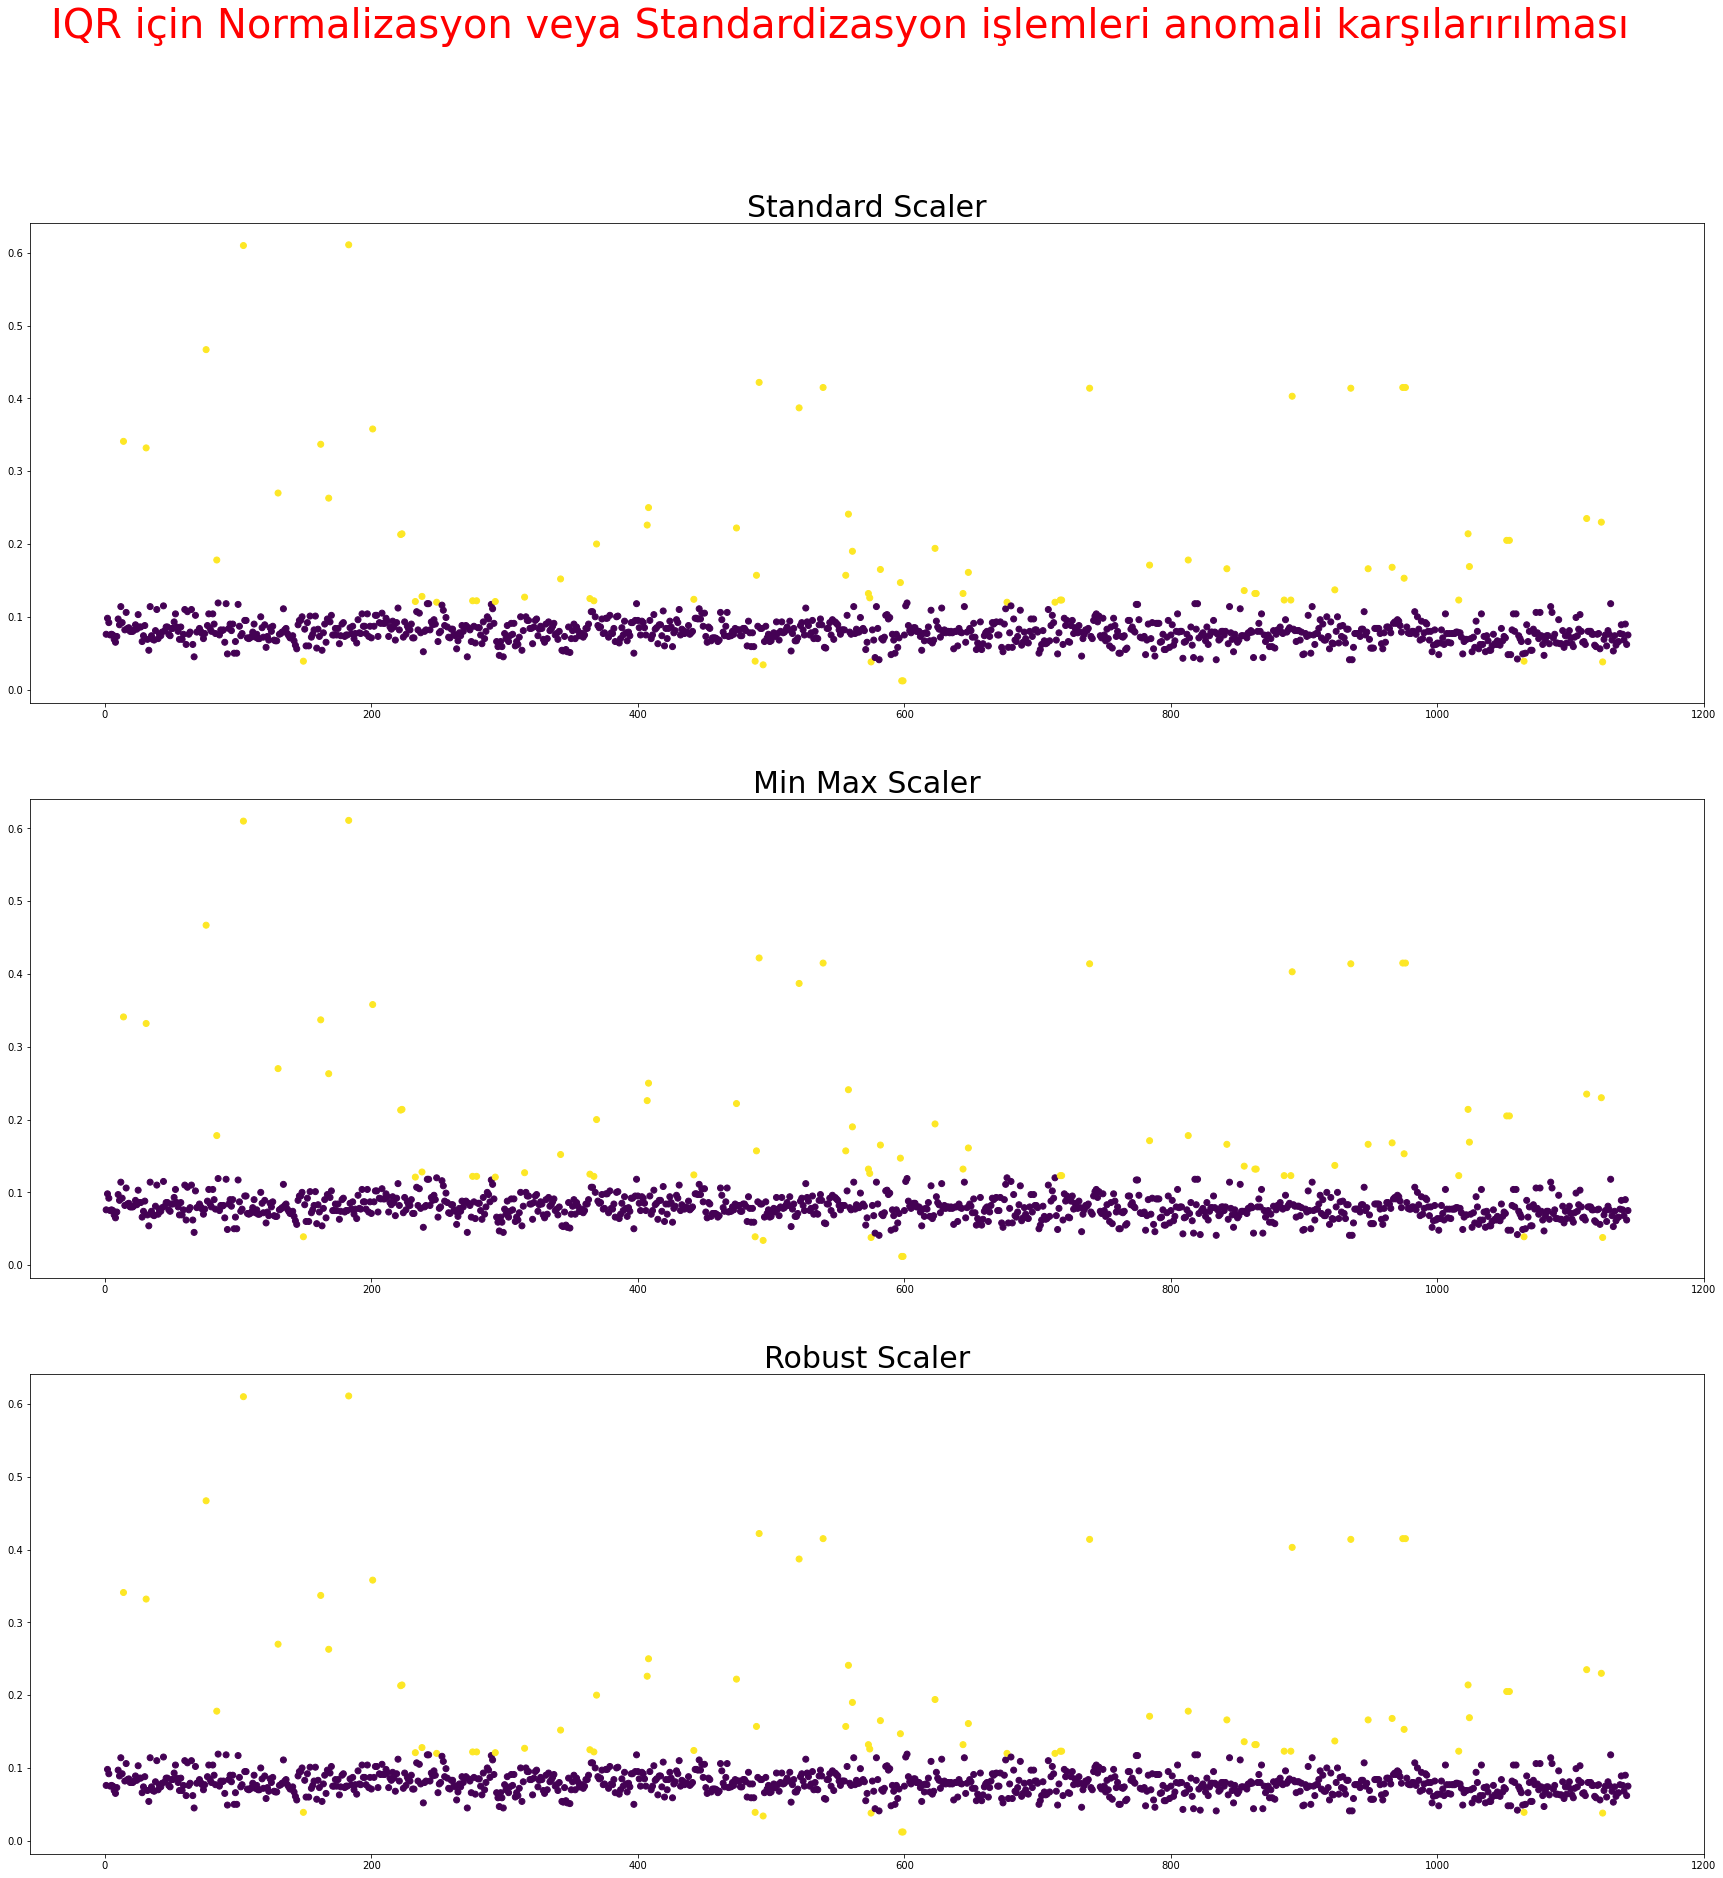

In [40]:
plt.subplots(1,3,figsize= (30,30))
plt.suptitle("IQR için Normalizasyon veya Standardizasyon işlemleri anomali karşılarırılması",fontsize = 40,color = 'r')

plt.subplot(311)
plt.title("Standard Scaler", fontdict = {'fontsize':30})
plt.scatter(np.arange(1,len(df)+1),data,c = iqr_df['Standard Scaler'])

plt.subplot(312)
plt.title("Min Max Scaler",fontdict = {'fontsize':30})
plt.scatter(np.arange(1,len(df)+1),data, c = iqr_df['Min Max Scaler'])

plt.subplot(313)
plt.title("Robust Scaler",fontdict = {'fontsize':30})
plt.scatter(np.arange(1,len(df)+1),data, c = iqr_df['Robust Scaler'])

plt.show()

Anomali değeri farklı olarak işeretlenmiş değerlere bakalım.

In [41]:
mask1 = (iqr_df['Standard Scaler'] != iqr_df['Min Max Scaler'])
mask2 = (iqr_df['Min Max Scaler'] != iqr_df['Robust Scaler'])
mask3 = (iqr_df['Robust Scaler'] != iqr_df['Standard Scaler'])

In [42]:
iqr_df[mask1 | mask2 | mask3]

,Standard Scaler,Min Max Scaler,Robust Scaler
248,1.0,0,1
676,1.0,0,1
712,1.0,0,1


### 3 Sigma Kuralı İle Anomali Tespiti

IQR için yaptığımız şeyleri 3 sigma için de yapıp görselleştirelim.

In [43]:
low_edge,upper_edge = adm.three_sigma(data.values)
print("-"*60)
low_edge_st, upper_edge_st = adm.three_sigma(standardized_data)
print("-"*60)
low_edge_mm, upper_edge_mm = adm.three_sigma(mm_scaled_data)
print("-"*60)
low_edge_r, upper_edge_r = adm.three_sigma(r_scaled_data)


Three Sigma process started.
Three Sigma precess completed successfully
Low Edge: -0.054807336235643156
Upper Edge: 0.22867260307728793
------------------------------------------------------------
Three Sigma process started.
Three Sigma precess completed successfully
Low Edge: -2.9992486888409746
Upper Edge: 2.999336177904842
------------------------------------------------------------
Three Sigma process started.
Three Sigma precess completed successfully
Low Edge: -0.11153144613629909
Upper Edge: 0.36172387825924535
------------------------------------------------------------
Three Sigma process started.
Three Sigma precess completed successfully
Low Edge: -6.6903668117821615
Upper Edge: 7.483630153864401


Anomali değerleri farklı scale türlerine göre değişimlerini grafik çizerek gözlemleyelim.

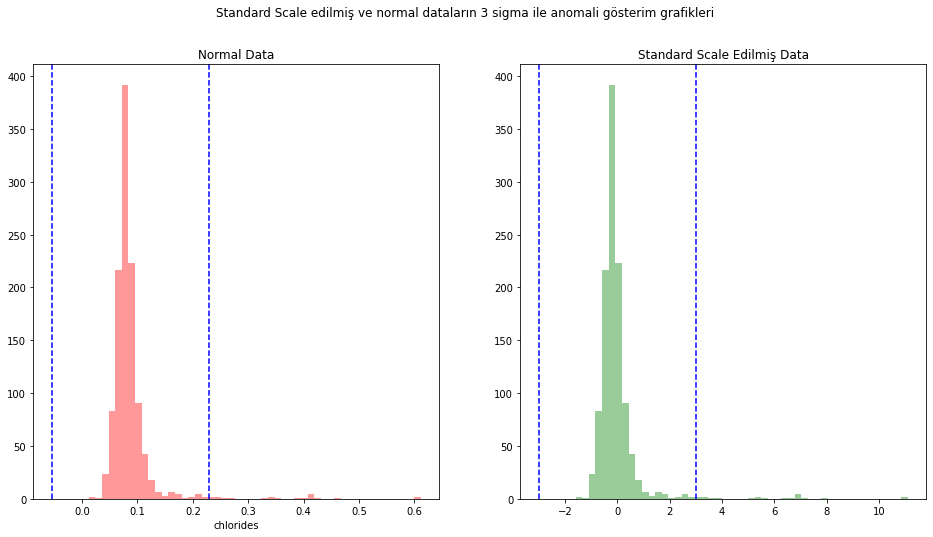

In [44]:
plt.subplots(1,2,figsize = (16,8))
plt.suptitle("Standard Scale edilmiş ve normal dataların 3 sigma ile anomali gösterim grafikleri")

plt.subplot(121)
plt.title("Normal Data")
plt.axvline(x = low_edge, c = "b", linestyle ='--')
plt.axvline(x = upper_edge, c = "b", linestyle ='--')
sns.distplot(data, kde = False,  color = 'r')

plt.subplot(122)
plt.title("Standard Scale Edilmiş Data")
plt.axvline(x = low_edge_st, c = "b", linestyle ='--')
plt.axvline(x = upper_edge_st, c = "b", linestyle ='--')
sns.distplot(standardized_data, kde = False,  color = 'g')

plt.show();

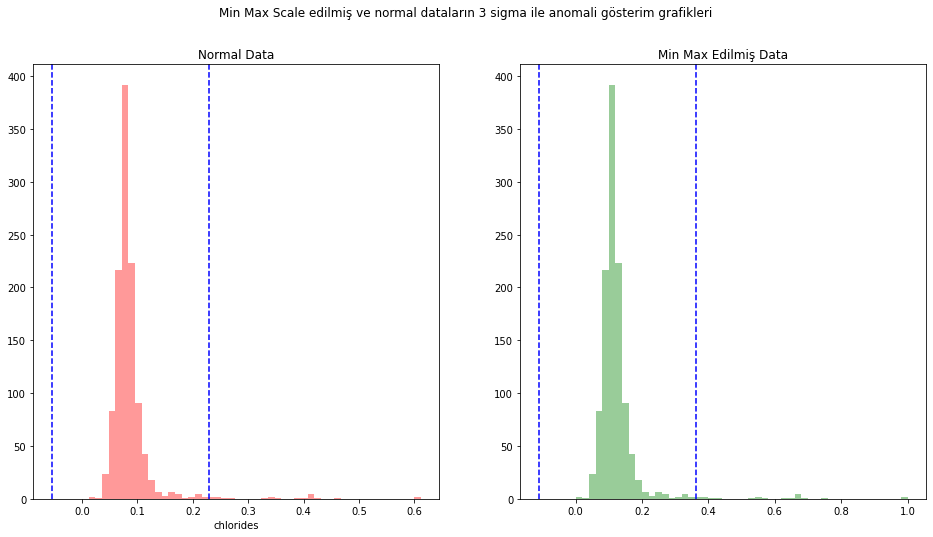

In [45]:
plt.subplots(1,2,figsize = (16,8))
plt.suptitle("Min Max Scale edilmiş ve normal dataların 3 sigma ile anomali gösterim grafikleri")

plt.subplot(121)
plt.title("Normal Data")
plt.axvline(x = low_edge, c = "b", linestyle ='--')
plt.axvline(x = upper_edge, c = "b", linestyle ='--')
sns.distplot(data, kde = False,  color = 'r')

plt.subplot(122)
plt.title("Min Max Edilmiş Data")
plt.axvline(x = low_edge_mm, c = "b", linestyle ='--')
plt.axvline(x = upper_edge_mm, c = "b", linestyle ='--')
sns.distplot(mm_scaled_data, kde = False,  color = 'g')

plt.show();

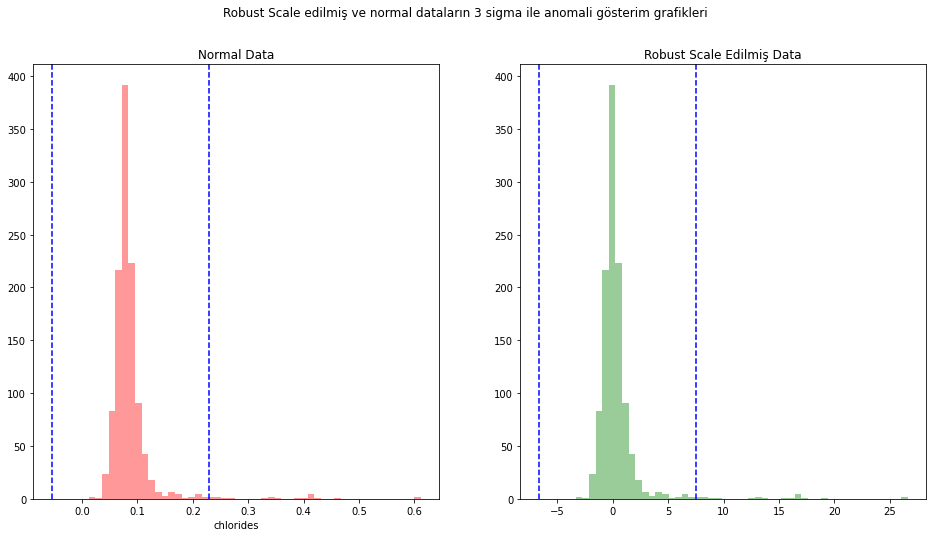

In [46]:
plt.subplots(1,2,figsize = (16,8))
plt.suptitle("Robust Scale edilmiş ve normal dataların 3 sigma ile anomali gösterim grafikleri")

plt.subplot(121)
plt.title("Normal Data")
plt.axvline(x = low_edge, c = "b", linestyle ='--')
plt.axvline(x = upper_edge, c = "b", linestyle ='--')
sns.distplot(data, kde = False,  color = 'r')

plt.subplot(122)
plt.title("Robust Scale Edilmiş Data")
plt.axvline(x = low_edge_r, c = "b", linestyle ='--')
plt.axvline(x = upper_edge_r, c = "b", linestyle ='--')
sns.distplot(r_scaled_data, kde = False,  color = 'g')

plt.show();

Anomali değerlerine sayısal olarak bakalım

In [47]:
normal_data_anomaly_index = df[(data < low_edge) | (data > upper_edge)].index
standardardized_data_anomaly_index = st_data_df[(st_data_df.values < low_edge_st) | (st_data_df.values > upper_edge_st)].index
mm_scaled_data_anomaly_index = mm_data_df[(mm_data_df.values < low_edge_mm) | (mm_data_df.values > upper_edge_mm)].index
r_scaled_data_anomaly_index = r_data_df[(r_data_df.values < low_edge_r) | (r_data_df.values > upper_edge_r)].index

print("Normal data anomali değer sayısı:", len(normal_data_anomaly_index))
print("Standardize edilmiş data anomali değer sayısı", len(standardardized_data_anomaly_index))
print("Min Mix Scale edilmiş data anomali değer sayısı:", len(mm_scaled_data_anomaly_index))
print("Robust Scale edilmiş data anomali değer sayısı:", len(r_scaled_data_anomaly_index))

Normal data anomali değer sayısı: 21
Standardize edilmiş data anomali değer sayısı 21
Min Mix Scale edilmiş data anomali değer sayısı: 21
Robust Scale edilmiş data anomali değer sayısı: 21


In [48]:
sigma_df = pd.DataFrame()
sigma_df['Standard Scaler'] = np.zeros(len(df))
sigma_df['Min Max Scaler'] = 0
sigma_df['Robust Scaler'] = 0

sigma_df.loc[standardardized_data_anomaly_index,'Standard Scaler'] = 1
sigma_df.loc[mm_scaled_data_anomaly_index,'Min Max Scaler'] = 1
sigma_df.loc[r_scaled_data_anomaly_index, 'Robust Scaler'] = 1

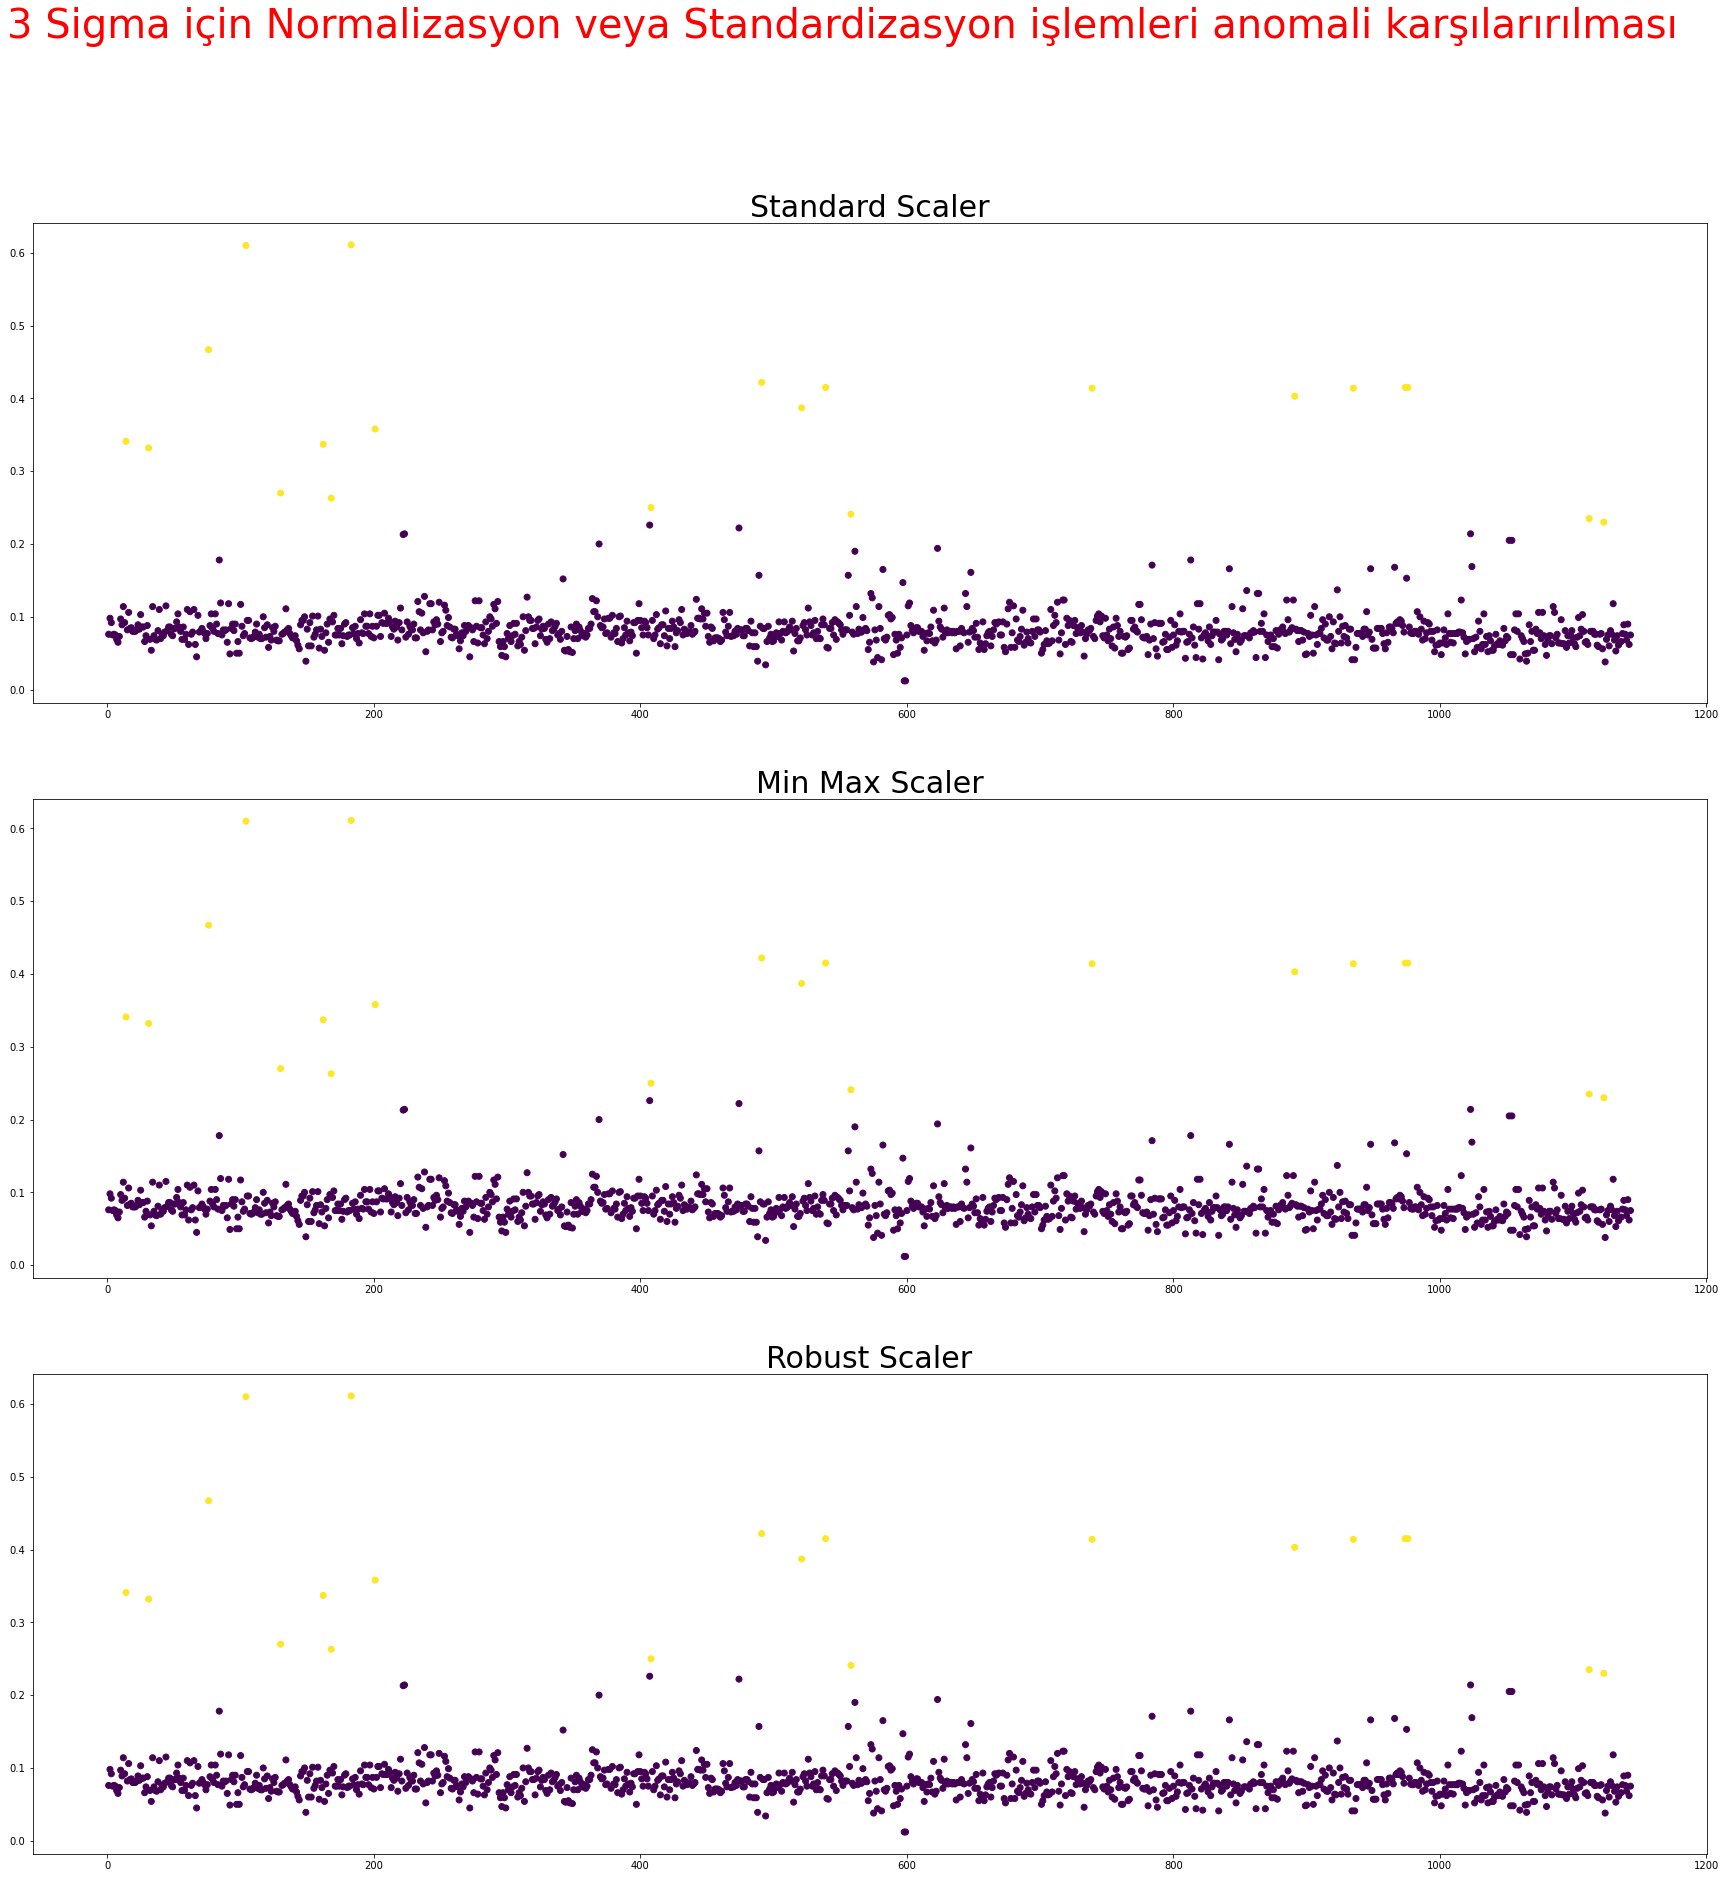

In [49]:
plt.subplots(1,3,figsize= (30,30))
plt.suptitle("3 Sigma için Normalizasyon veya Standardizasyon işlemleri anomali karşılarırılması",fontsize = 40,color = 'r')

plt.subplot(311)
plt.title("Standard Scaler", fontdict = {'fontsize':30})
plt.scatter(np.arange(1,len(df)+1),data,c = sigma_df['Standard Scaler'])

plt.subplot(312)
plt.title("Min Max Scaler",fontdict = {'fontsize':30})
plt.scatter(np.arange(1,len(df)+1),data, c = sigma_df['Min Max Scaler'])

plt.subplot(313)
plt.title("Robust Scaler",fontdict = {'fontsize':30})
plt.scatter(np.arange(1,len(df)+1),data, c = sigma_df['Robust Scaler'])

plt.show()

Grafikteki kırmızı çizgilerin dış tarafları anomali verilerdir.

Farklı değer varsa ayrıntılı olarak göz atalım.

In [50]:
sigma_df[(sigma_df['Standard Scaler'] != sigma_df['Min Max Scaler']) 
       | (sigma_df['Min Max Scaler'] != sigma_df['Robust Scaler'])
       | (sigma_df['Robust Scaler'] != sigma_df['Standard Scaler'])]

,Standard Scaler,Min Max Scaler,Robust Scaler


Görülüdüğü üzere farklı değerlendirilen değer bulunmamıştır.